# Clustering
Mengxia Shi & Mikhail Zakharov | 5 SDBD B1

*2.5 sessions to finish this (0.5 left)*

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.io import arff
from sklearn import cluster
from sklearn import metrics
import hdbscan

## 1. Load data

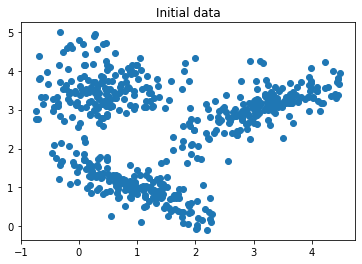

In [14]:
# Selected examples:
# dataset (true number of clusters; ?params)
# k-means (good): DS-577 (3), 2d-4c (4), R15 (15), spherical_5_2 (5)
# k-means (bad): 3-spiral (3), banana (2), curves1 vs. curves2 (2)
# agglo (good): curves2 (2;single), donut1 (2;single), DS-577 (3;complete/ward), ds4c2sc8 (?)
# agglo (bad): flame (2), zelnik2 (3), disk-4500n (2)
# dbscan (good): spiral (3;0.5,5), donut3 (3;0.02,5), dartboard2 (4;0.01,5)
# dbscan (bad): 2d-3c-no123 (3), disk-4600n (2), ds4c2sc8 (8)

dataset = 'spherical_5_2.arff'
true_cluster_number = 5

data_path = "clustering-benchmark-master/src/main/resources/datasets/artificial/"

data_load = arff.loadarff(open(data_path + dataset, 'r'))[0]

x = [point[0] for point in data_load]
y = [point[1] for point in data_load]
data_xy = list(zip(x,y))

plt.scatter(x,y)
plt.title("Initial data")
plt.show()

## 2. k-Means

### 2.1.1 Clustering with known true number of clusters

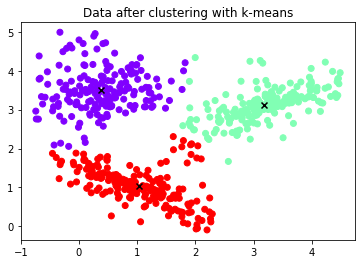

In [16]:
kmeans = cluster.KMeans(n_clusters=true_cluster_number, init='k-means++').fit(data_xy)

center_x = [point[0] for point in kmeans.cluster_centers_]
center_y = [point[1] for point in kmeans.cluster_centers_]

plt.scatter(x, y, c=kmeans.labels_, cmap='rainbow')
plt.scatter(center_x, center_y, marker="x", c="#000")
plt.title("Data after clustering with k-means")
plt.show()

### 2.1.2 Automatically determining the true number of clusters using evaluation metrics

Many of the evaluation metrics provided by `sklearn.metrics` require knowledge of the ground truth. They are therefore academic in nature and shall not be considered, as in reality there is no known ground truth.

The metrics considered are therefore the:  
* i) Silhouette Coefficient,
* ii) Calinski-Harabasz Index, and
* iii) Davies-Bouldin Index

### 2.1.2.i Silhouette Coefficient

In [4]:
max_score = -1 # Lower bound for Silhouette coefficient (higher is better)
score = 0      # Initial score
n_clust = 2    # There must be at least two clusters 

results_SC = []
times_SC = []

# or just do 2-30 or something
#while score > (max_score * 0.9):
while n_clust < 10:
    time_start = time.time()
    
    kmeans = cluster.KMeans(n_clusters=n_clust, init='k-means++').fit(data_xy)
    
    time_post_cluster = time.time()
    
    score = metrics.silhouette_score(data_xy, kmeans.labels_)
    
    time_post_score = time.time()
    
    if score > max_score:
        max_score = score
    
    results_SC.append((n_clust, score))
    times_SC.append((time_start, time_post_cluster, time_post_score))
    
    n_clust += 1

best_n_clusters_guess = max(results_SC, key=lambda r: r[1])
print(f"I determine the number of clusters to be: {best_n_clusters_guess[0]}.")
print(f"It took me {times_SC[-1][2]-times_SC[0][0]} seconds to figure that out. ({len(results_SC)} iterations)")

I determine the number of clusters to be: 5.
It took me 46.110167503356934 seconds to figure that out. (8 iterations)


### 2.1.2.ii Calinski-Harabasz index

In [5]:
max_score = -1 # Assumed lower bound for CH index (higher is better)
score = 0      # Initial score
n_clust = 2    # There must be at least two clusters 

results_CHI = []
times_CHI = []

# or just do 2-30 or something
#while score > (max_score * 0.7):
while n_clust < 10:
    time_start = time.time()
    
    kmeans = cluster.KMeans(n_clusters=n_clust, init='k-means++').fit(data_xy)
    
    time_post_cluster = time.time()
    
    score = metrics.calinski_harabasz_score(data_xy, kmeans.labels_)
    
    time_post_score = time.time()
    
    if score > max_score:
        max_score = score
    
    results_CHI.append((n_clust, score))
    times_CHI.append((time_start, time_post_cluster, time_post_score))
    
    n_clust += 1

best_n_clusters_guess = max(results_CHI, key=lambda r: r[1])
print(f"I determine the number of clusters to be: {best_n_clusters_guess[0]}.")
print(f"It took me {times_CHI[-1][2]-times_CHI[0][0]} seconds to figure that out. ({len(results_CHI)} iterations)")

I determine the number of clusters to be: 5.
It took me 41.12265491485596 seconds to figure that out. (8 iterations)


### 2.1.2.iii Davies–Bouldin index

In [213]:
min_score = 1 # Assumed upper bound for DB index (lower is better)
score = 1.1   # Initial score
n_clust = 2   # There must be at least two clusters 

results_DBI = []
times_DBI = []

# or just do 2-30 or something
while score < (min_score * 1.423):
    time_start = time.time()
    
    kmeans = cluster.KMeans(n_clusters=n_clust, init='k-means++').fit(data_xy)
    
    time_post_cluster = time.time()
    
    score = metrics.davies_bouldin_score(data_xy, kmeans.labels_)
    
    time_post_score = time.time()
    
    if score < min_score:
        min_score = score
    
    results_DBI.append((n_clust, score))
    times_DBI.append((time_start, time_post_cluster, time_post_score))
    
    n_clust += 1

best_n_clusters_guess = min(results_DBI, key=lambda r: r[1])
print(f"I determine the number of clusters to be: {best_n_clusters_guess[0]}.")
print(f"It took me {times_DBI[-1][2]-times_DBI[0][0]} seconds to figure that out. ({len(results_DBI)} iterations)")

I determine the number of clusters to be: 5.
It took me 38.592660903930664 seconds to figure that out. (8 iterations)


### 2.2 Limits of k-means clustering

(maybe the three metrics above give a good reading for a bad clustering, in which case another metric is needed to judge the clustering's "goodness" ~ test and develop further)

(use curves1 vs. curves2 example to explain the center and convexity limitation of k-means)

## 3. Agglomerative Clustering

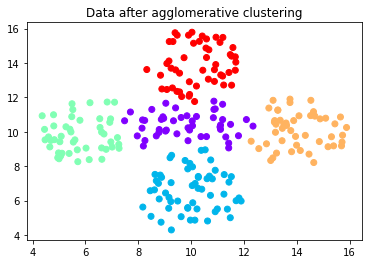

In [7]:
agglo = cluster.AgglomerativeClustering(n_clusters=true_cluster_number, linkage='ward').fit(data_xy)

plt.scatter(x, y, c=agglo.labels_, cmap='rainbow')
plt.title("Data after agglomerative clustering")
plt.show()

### 3.2 Limits of agglomerative clustering

(low-separation, uniform density)

(only based on distance between points, explain with zelnik example)

## 4. DBSCAN

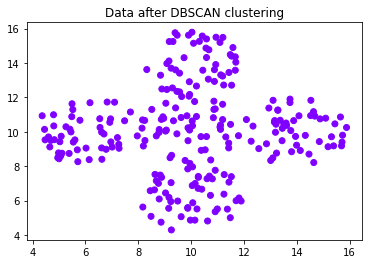

In [8]:
dbscan = cluster.DBSCAN(eps=0.06, min_samples=5).fit(data_xy)

plt.scatter(x, y, c=dbscan.labels_, cmap='rainbow')
plt.title("Data after DBSCAN clustering")
plt.show()

### 4.2 Limits of DBSCAN clustering

struggles with uniform density

and can get tripped up on "intermediary chains" (see cure-* examples)

but does well against noise (duh)

## 5. HDBSCAN

"insensitive to density variation"

compare DBSCAN and HDBSCAN -- pros cons of each, performance (time) difference?

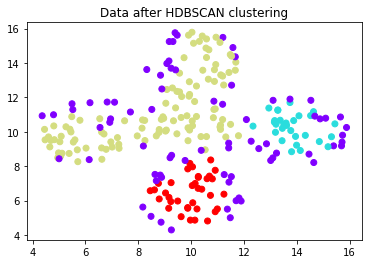

In [9]:
maa = hdbscan.HDBSCAN(min_cluster_size=10).fit(data_xy)

plt.scatter(x, y, c=maa.labels_, cmap='rainbow')
plt.title("Data after HDBSCAN clustering")
plt.show()

## Notes

Measure time:
* to compare between different clustering methods
* to see how execution time depends on number of clusters to calculate
* between different stop conditions\*

\* All these things are choices to justify. What stop condition to use (time vs. accuracy trade-off)? ...

evaluate method within itself (diff params) and with other methods using the best config on same data

## Links
* https://pymfe.readthedocs.io/en/latest/auto_examples/03_miscellaneous_examples/plot_using_pandas_csv_arff.html

* https://github.com/deric/clustering-benchmark